In [ ]:
'''
    LINKS REVISADOS CON EXPLICACIONES DE LA LIBRERIA sklearn.neighbors
    
    http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html
    http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#example-neighbors-plot-classification-py
    http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score
'''

In [1]:
'''
    PAQUETES UTILIZADOS
'''
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
'''
    FUNCION init
    Regresa el conjunto de datos "base_X" y el conjunto de valores objetivo "base_y"
'''
def init():
    # Lectura de la base de datos
    base = pd.read_csv('OnlineNewsPopularity.csv', sep=",")
    # Subconjunto: 10000 observaciones originales
    base2 = base[0:10000]

    # Copia de la base sin la primer columna ('url', atributo no predictivo) y sin la variable objetivo
    # Matriz de entrenamiento
    base_X = base2.drop(base.columns[[0,1,len(base2.columns)-1]], axis=1)

    # Arreglo de valores objetivo (columna de valores objetivo 'shares')
    base_y = np.asarray(base2[base2.columns[len(base2.columns)-1]].tolist())
    
    return base_X, base_y

In [5]:
'''
    FUNCION subConjEst
    Recibe el conjunto de datos "base_X" y el conjunto de valores objetivo "base_y"
    Regresa los conjuntos de entrenamiento "X_train" (estandarizado) y "y_train", así como
        los conjuntos "X_test" (estandarizado) y "y_test"
'''
def subConjEst(base_X, base_y):
    # len(X_train) = len(y_train) = 750
    # len(X_test) = len(y_test) = 250
    # Los índices de ambos conjuntos (train o test) se corresponden de acuerdo a la base de datos original
    X_train, X_test, y_train, y_test = train_test_split(base_X, base_y, test_size=0.25)

    # Estandarización de los datos con respecto a su subconjunto
    X_train = StandardScaler().fit_transform(X_train, y_train)
    X_test = StandardScaler().fit_transform(X_test, y_train)
    
    return X_train, X_test, y_train, y_test

In [11]:
'''
    FUNCION predict
    Recibe los conjuntos de entrenamiento "X_train" y "y_train", así como el de prueba "X_test"
    Regresa el conjunto de valores predecidos en el arreglo "X_predict"
'''
def predict(X_train, y_train, X_test):
    # Creación de una instancia de 'Neighbours Classifier'
    # Sin atributos, se analizan los datos y se eligen la mejor forma de obtener los k-vecinos
    neigh = KNeighborsClassifier()
    #neigh = KNeighborsClassifier(n_neighbors=8, weights='distance', algorithm='auto', n_jobs=-1)

    # Entrenamiento de los datos
    neigh.fit(X_train,y_train)
    
    # Predicción de valores objetivo con el conjunto de prueba
    # En teoría, X_test debería ser igual a y_test
    X_predict = neigh.predict(X_test)
    
    # Exactitud promedio de la predicción calculada con la librería
    accuracy = neigh.score(X_test, y_test)
    print 'Accuracy: ', accuracy
    
    return X_predict

In [2]:
'''
    FUNCION error_fn
    Recibe el arreglo con valores a predecir "X_predict", el arreglo de valores esperados "y_test"
        y el valor de tolerancia "k"
    Regresa el porcentaje de acierto de la predicción
'''
def error_fn(X_predict, y_test, k):
    i = 0
    yei = 0
    for i in range(len(X_predict)):
        if np.absolute(X_predict[i] - y_test[i]) < k:
            yei = yei + 1
    return yei/float(len(X_predict))

In [14]:
'''
    PRUEBA DEL METODO
'''
# Obtenemos los conjuntos de datos y de valores objetivo
base_X, base_y = init()

# Obtenemos subconjuntos de datos (75% para entrenamiento, 25% para prueba)
X_train, X_test, y_train, y_test = subConjEst(base_X, base_y)

# Predicción del número de "shares"
X_predict = predict(X_train, y_train, X_test)

Accuracy:  0.0108


In [16]:
'''
    IMPRESION DE VALORES
'''
print 'Valores esperados', y_test
print 'Valores predecidos', X_predict

Valores esperados 
[1000 1600 7800 ..., 1200 1900  808]
Valores predecidos 
[ 775 1700 1200 ...,  437 1600  805] 



Máximo acierto con k = 850


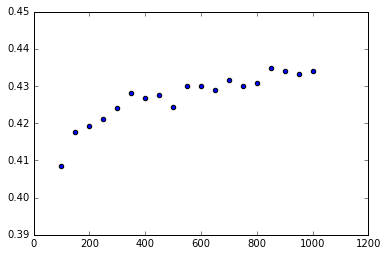

In [17]:
'''
    OBTENCION DE UN K MAXIMO 
    %Acierto vs. K
'''
# Cálculo de error para k vecinos (rango [100 : 50 : 1000])
err_arr = []
arr = np.arange(100, 1050, 50)
for i in arr:
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_train,y_train)
    X_predict = neigh.predict(X_test)
    # Rango de tolerancia de 500 vecinos
    err = error_fn(X_predict, y_test, 500)
    err_arr.append(err)

# Graficación de resultados
plt.scatter(arr, err_arr)

# Encontrar el k máximo con esta prueba
maxi = err_arr.index(max(err_arr))
maxi = arr[maxi]
print 'Máximo acierto con k =', maxi

In [18]:
'''
    PRUEBAS DE MARGEN DE ERROR
    Con el k máximo obtenido "maxi"
'''
neigh = KNeighborsClassifier(n_neighbors=maxi, n_jobs=-1)
neigh.fit(X_train,y_train)
X_predict = neigh.predict(X_test)

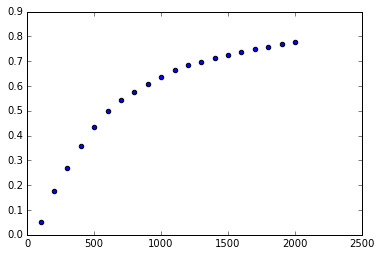

In [19]:
# Margen de error rango [100 : 100 : 2000]
err_arr = []
arr = np.arange(100, 2100, 100)
for i in arr:
    err = error_fn(X_predict, y_test, i)
    err_arr.append(err)
plt.scatter(arr, err_arr)